### COURSERA ML WEEK 2 PROGRAMMING ASSIGNMENT FOR MULTI-VARIATE LINEAR REGRESSION

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('ex1data2.txt', names = ['size', '# Bedrooms', 'Prize'])

In [23]:
print(df.head())
print(df.info())
df.describe()

   size  # Bedrooms   Prize
0  2104           3  399900
1  1600           3  329900
2  2400           3  369000
3  1416           2  232000
4  3000           4  539900
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
size          47 non-null int64
# Bedrooms    47 non-null int64
Prize         47 non-null int64
dtypes: int64(3)
memory usage: 1.2 KB
None


,size,# Bedrooms,Prize
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Feature Normalization


In [24]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2:].values
m = len(X)

In [25]:
X1 = (X - np.mean(X))/np.std(X)
#Adding the intercept
X1 = np.hstack((np.ones((m,1)), X1))

### Gradient Descent 

In [26]:
theta = np.zeros((3,1))
alpha = 0.01
iterations = 400

In [27]:
def cost_function(X1, y, theta):
    y_pred = np.dot(X1, theta)
    return np.sum((y_pred-y)**2)/ (2*m)

In [28]:
# Initial cost function
cost_function(X1, y, theta)

65591548106.45744

In [29]:
def gradient_descent(X1, y, theta, iterations, alpha):
    costs = []
    for _ in range(iterations):
        y_pred = np.dot(X1, theta) - y
        error = np.dot( X1.transpose(),y_pred)
        theta -= alpha / m * np.sum(error)
        costs.append(cost_function(X1, y, theta))
    return theta, costs

In [30]:
theta, costs = gradient_descent(X1, y, theta, iterations, alpha)

In [31]:
# Cost Function after optimization
cost_function(X1, y, theta)

7662154218.688378

In [32]:
theta

array([[279660.47007446],
       [279660.47007446],
       [279660.47007446]])

### Plotting the COST FUNCTIONS to Verify our Gradient Descent Algorithm:

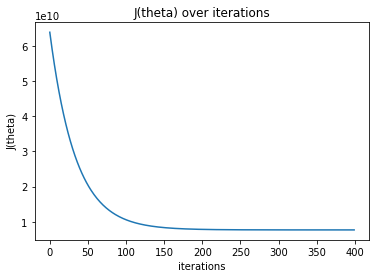

In [33]:
plt.plot(costs)
plt.title('J(theta) over iterations')
plt.xlabel('iterations')
plt.ylabel('J(theta)');

In [34]:
# Normal Equation
# theta1 = np.linalg.inv(np.dot(X.transpose(), X)).dot(X.transpose()).dot(y)

In [35]:
# cost_function(X1, y, theta1)

In [36]:
#Predicting price of house with size 1650 and 3 rooms:
x = np.array([1650, 3])

In [37]:
x = (x - np.mean(X))/np.std(X)
x = np.hstack((np.ones(1), x))

In [38]:
x

array([ 1.        ,  0.56696808, -0.87391021])

In [39]:
predict = np.dot(x, theta)

In [40]:
print(predict)

[193820.89057073]
